In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### 1) Function for gradient descent

In [ ]:
def gradient_descent(f, grad_f, x0, kmax, lr=None, tolf = 10e-6, tolx = 10e-6):
    '''
    Inputs : 
       - f is a python function
       - grad_f is a python function
       - x0 is the starting guess
       - tolf and tolx are conditions
       - kmax is maximum number of iteration, to avoid infinite loops
       - lr is the value of alpha, if None the armijo rule is applied
    Returns :
       x --> stationary point
       f_val --> A vector containing the values of f during the iterations
       err_val --> A vector containing the values of || grad(f(Xk) || 
    '''
    k = 0

    fval = np.zeros((kmax + 1,))
    
    err_val = np.zeros((kmax +1,))

    grads = []

    conditions = False  
    
    first_value = x0
    
    x_val = []
    
    
   
    while not conditions:
        #update alpha
        if lr == None:
            alpha = backtracking(f, grad_f, x0)
        else : 
            alpha = lr
        # update x 

        grad = np.array(grad_f(x0))
        print(x0)
        x = x0 - np.abs(grad) * alpha
        print(x)
        x_val.append(x)
        grads.append(grad)
        fval[k] = f(x)
        err_val[k] = np.linalg.norm(x - x0)

        # conditions to finish the loop update
        conditions = k >= kmax or np.linalg.norm(grad_f(x)) < tolf * np.linalg.norm(grad_f(first_value)) or err_val[k] < tolx * np.linalg.norm(x0)  
       
        x0 = x

        k += 1

    fval = fval[:k]
    err_val = err_val[:k]

    return x, fval, err_val, x_val, grads

def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * np.array(grad_f(x))) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha


## 1.1) Testing with different functions

In [56]:
def f1(x):
    return (x[0] - 3)**2 + (x[1] -1)**2
def grad_f1(x):
    return 2 * (x[0] - 3), 2 * (x[1] - 1)

def f2(x):
    return 10 * (x[0] - 1)**2 + (x[1] - 2)**2
def grad_f2(x):
    return 20 * (x[0] - 1), 2 * (x[1] - 2)

def f3(N, x):
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    return np.linalg.norm(A @ x - b, 'fro')**2
def grad_f3(x, N):
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    return -2 * (b - A @ x).T @ A

def f4(N, x, lmbd):
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    return np.linalg.norm(A @ x - b, 'fro') + lmbd / 2 * np.linalg.norm(x)**2
def grad_f4(N, x, lmbd):
    '''
    Shapes :
       A --> N x N 
       b --> N x 1
       x --> N x 1 
    '''
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    return -2 * (b - A @ x).T @ A + lmbd * x.T

def f5(x):
    return x**4 + x**3 - 2 * x**2 - 2 * x
def grad_f5(x):
    return 4 * x**3 + 3 * x **2 - 4 * x - 2


[-0.3125 -0.0625]
[-20.  -4.]
[-0.72265625 -0.12695312]
[-26.25   -4.125]
[-1.26098633 -0.19342041]
[-34.453125    -4.25390625]
[-1.96754456 -0.2619648 ]
[-45.21972656  -4.38684082]
[-2.89490223 -0.3326512 ]
[-59.35089111  -4.5239296 ]
[-4.11205918 -0.40554655]
[-77.89804459  -4.6653024 ]
Min obtained : [-4.11205918 -0.40554655]
Real minimum : [1 2]
 Final error : [-5.11205918 -2.40554655]
 lr : Armijo


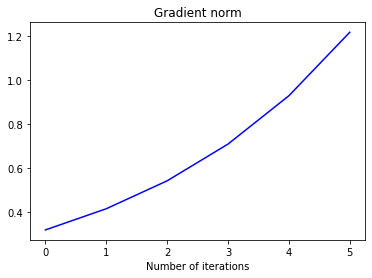

40


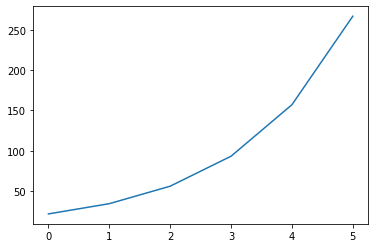

In [83]:
# 1) f1
lrates = [1 / n**4 for n in range(1,10)]
real_min = np.array((1, 2))
#for lr in lrates:
x , f_val, err_val, x_val, grads = gradient_descent(f2, grad_f2, np.zeros((2,)), kmax = 1, lr=None)
print(
    'Min obtained : {}\nReal minimum : {}\n Final error : {}\n lr : {}'.format(x, real_min, x - real_min, 'Armijo')
)
plt.subplot()
plt.plot(range(len(err_val)), err_val, 'b')
plt.title('Gradient norm')
plt.xlabel('Number of iterations')
plt.show()

plt.subplot()
plt.plot(range(len(f_val)), f_val)
print(f1((-3, -1)))
